# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

Starting from: https://github.com/squillero/computational-intelligence/blob/master/2024-25/set-cover.ipynb

Solve efficiently these instances customizing a technique discussed in class:
| Instance | Universe size | Num sets | Density |
|----------|---------------|----------|---------|
| 1        | 100           | 10       | 0.2     |
| 2        | 1,000         | 100      | 0.2     |
| 3        | 10,000        | 1,000    | 0.2     |
| 4        | 100,000       | 10,000   | 0.1     |
| 5        | 100,000       | 10,000   | 0.2     |
| 6        | 100,000       | 10,000   | 0.3     |

I tried using simulated annealing technique to solve the problem. Basically is Hill Climbing with a probability p != 0 of accepting a worsening solution s', where f(s) > f(s'):

$$ p = e^{-\frac{f(s) - f(s')}{t}} $$

f stands for the fitness of the solution.

In [51]:
from random import random, seed
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from itertools import accumulate
from tqdm.auto import tqdm
from icecream import ic

## Initialization

In [52]:
#parameters for instances
USIZES_LIST = [100, 1000, 10000, 100000, 100000, 100000]
NSETS_LIST = [10, 100, 1000, 10000, 10000, 10000]
DENSITIES_LIST = [.2, .2, .2, .1, .2, .3]

In [53]:
UNIVERSE_SIZE = None
NUM_SETS = None
#probability that an element belongs to a set
DENSITY = None 

SETS = None
COSTS = None

In [54]:
# DON'T EDIT THESE LINES! --> 
# I wrapped the code inside a function in order to be runned again for the number of instances defined in the problem

def create_and_define_sets():
    global SETS, COSTS
    SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
    for s in range(UNIVERSE_SIZE):
        if not np.any(SETS[:, s]):
            SETS[np.random.randint(NUM_SETS), s] = True
    COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [55]:
# solution represents which sets have been selected

def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    phenotype = np.logical_or.reduce(SETS[solution])
    return np.all(phenotype)

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

In [56]:
def tweak(solution):
    # Define a new solution
    mask = np.random.random(NUM_SETS) < 0.01
    new_solution = np.logical_xor(solution, mask)
    return new_solution

""" The goal is to minimize the cost, but at the same time solution HAS TO BE VALID!!"""
def fitness(solution: np.ndarray):
    return (valid(solution), -cost(solution))

# WHY cost is returned negative:
# (0, -100) > (0, -500)
# (1, -100) > (1, -500) --> I want this condition: the goal is to minimize cost, but at the same time solution has to be valid!

## Simulated Annealing

In [57]:
MAX_ITERATIONS = 1000

INITIAL_TEMP = 7000
COOLING_RATE = 0.985

MIN_TEMP = 1e-17    #could be changed to avoid overflow

In [58]:
def simulated_annealing(initial_solution):
    """simulated annealing implementation"""
    best_solution = initial_solution.copy()
    fitness_solution = fitness(best_solution)
    history = [fitness_solution[1]]       

    temperature = INITIAL_TEMP

    for _iteration in tqdm(range(MAX_ITERATIONS)):

        new_solution = tweak(best_solution)
        f = fitness(new_solution)
        history.append(f[1]) 

        if f[0]:    #if solution is valid

            new_cost = -f[1]
            cost_diff = new_cost - (-fitness_solution[1])

            # If new_cost is better change solution, otherwise use probability to accept a worse solution
            # Accepting worsening solution? 0 < e^(-x) <= 1
            if cost_diff < 0 or np.random.random() < np.exp(-cost_diff / temperature):
                best_solution = new_solution.copy()
                fitness_solution = fitness(best_solution)

        if temperature > MIN_TEMP:
            # Reduce temperature
            temperature *= COOLING_RATE

    return best_solution, -fitness_solution[1], history

## Trials

  0%|          | 0/1000 [00:00<?, ?it/s]

Best solution cost: 279.0280561742059
Is the solution valid? Yes
Numbers of subsets: 10


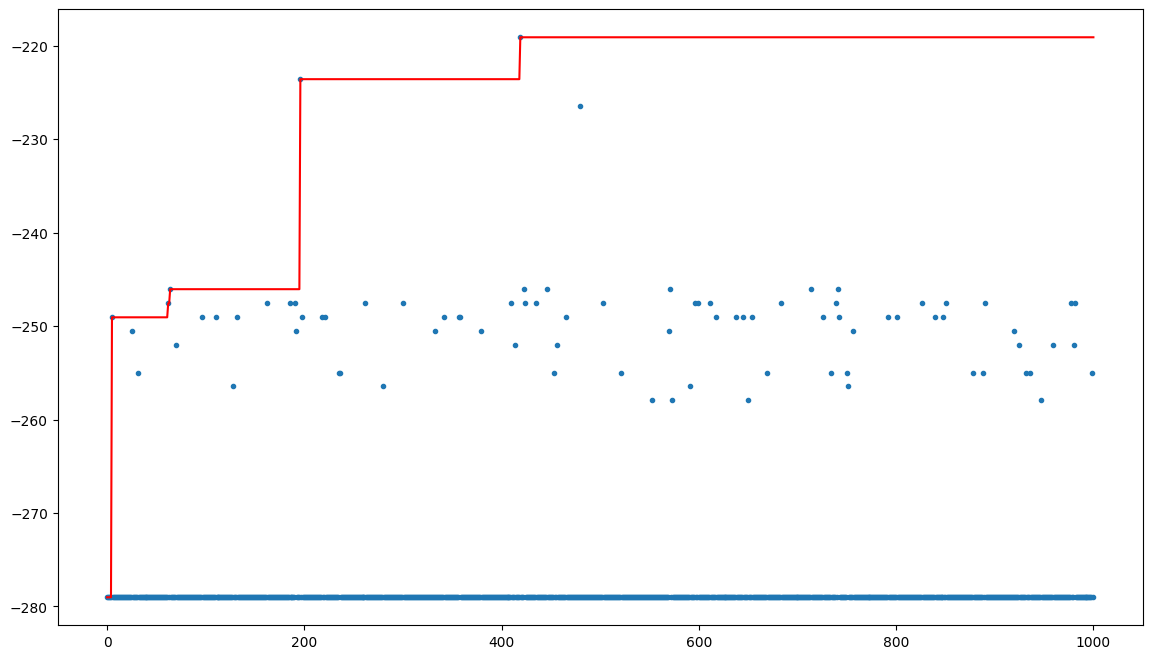

In [59]:
""" Instance: 1"""
UNIVERSE_SIZE = USIZES_LIST[0]
NUM_SETS = NSETS_LIST[0]
DENSITY = DENSITIES_LIST[0] 

create_and_define_sets()

initial_solution = np.full(NUM_SETS, True)  # Starting from an always valid solution?

best_solution, best_cost, history = simulated_annealing(initial_solution)

print(f"Best solution cost: {best_cost}")
print(f"Is the solution valid? {'Yes' if valid(best_solution) else 'No'}")
print(f"Numbers of subsets: {np.count_nonzero(best_solution)}")

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),     #plot max cost at each step
    color="red"
)
_ = plt.scatter(range(len(history)), history, marker=".")

  0%|          | 0/1000 [00:00<?, ?it/s]

Best solution cost: 6708.367353432016
Is the solution valid? Yes
Numbers of subsets: 20


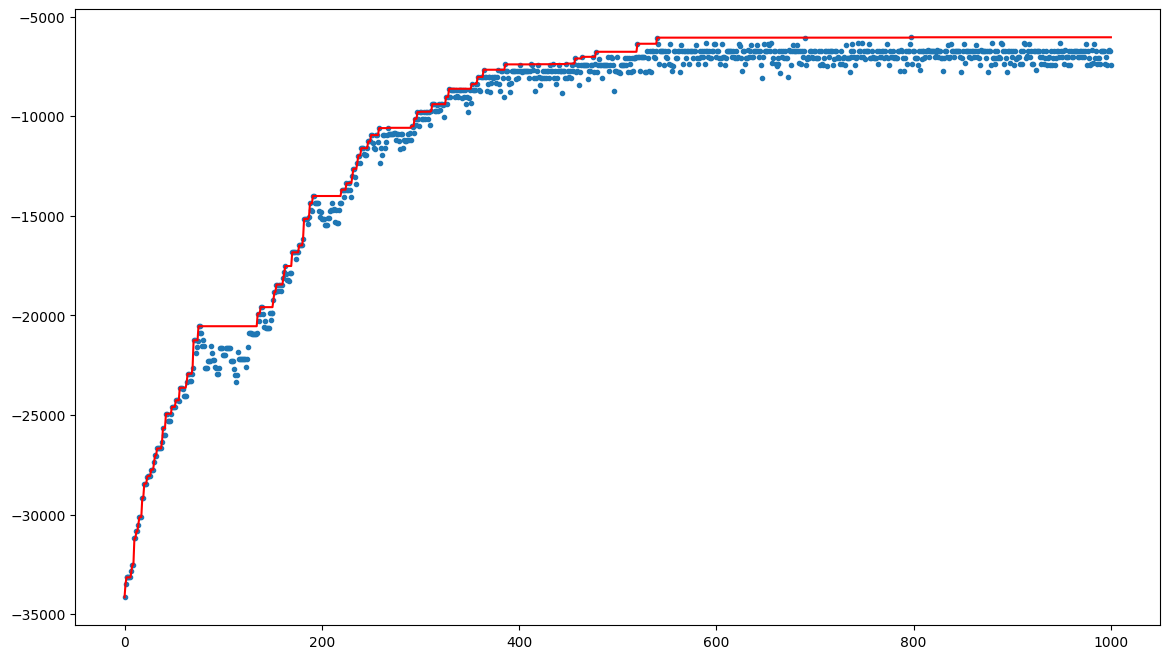

In [60]:
""" Instance: 2"""
UNIVERSE_SIZE = USIZES_LIST[1]
NUM_SETS = NSETS_LIST[1]
DENSITY = DENSITIES_LIST[1] 

create_and_define_sets()

initial_solution = np.full(NUM_SETS, True)  # Starting from an always valid solution?

best_solution, best_cost, history = simulated_annealing(initial_solution)

print(f"Best solution cost: {best_cost}")
print(f"Is the solution valid? {'Yes' if valid(best_solution) else 'No'}")
print(f"Numbers of subsets: {np.count_nonzero(best_solution)}")

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),     #plot max cost at each step
    color="red"
)
_ = plt.scatter(range(len(history)), history, marker=".")

  0%|          | 0/1000 [00:00<?, ?it/s]

Best solution cost: 1131628.7381450636
Is the solution valid? Yes
Numbers of subsets: 265


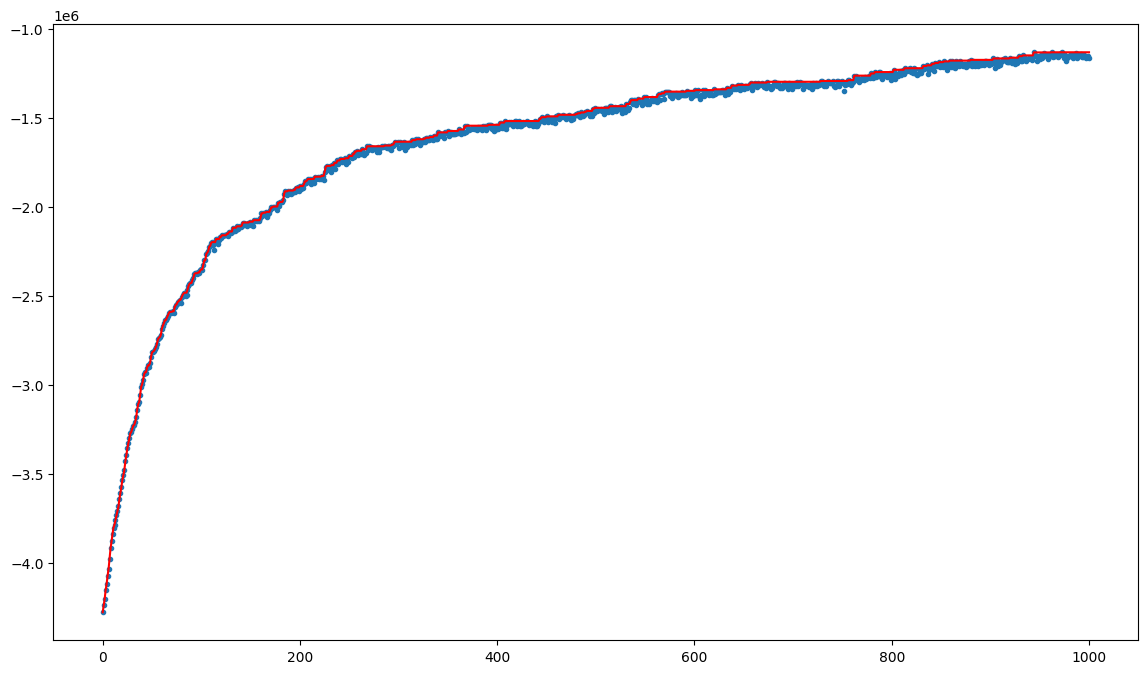

In [61]:
""" Instance: 3"""
UNIVERSE_SIZE = USIZES_LIST[2]
NUM_SETS = NSETS_LIST[2]
DENSITY = DENSITIES_LIST[2] 

create_and_define_sets()

initial_solution = np.full(NUM_SETS, True)  # Starting from an always valid solution?

best_solution, best_cost, history = simulated_annealing(initial_solution)

print(f"Best solution cost: {best_cost}")
print(f"Is the solution valid? {'Yes' if valid(best_solution) else 'No'}")
print(f"Numbers of subsets: {np.count_nonzero(best_solution)}")

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),     #plot max cost at each step
    color="red"
)
_ = plt.scatter(range(len(history)), history, marker=".")

  0%|          | 0/1000 [00:00<?, ?it/s]

Best solution cost: 107483212.70203757
Is the solution valid? Yes
Numbers of subsets: 4279


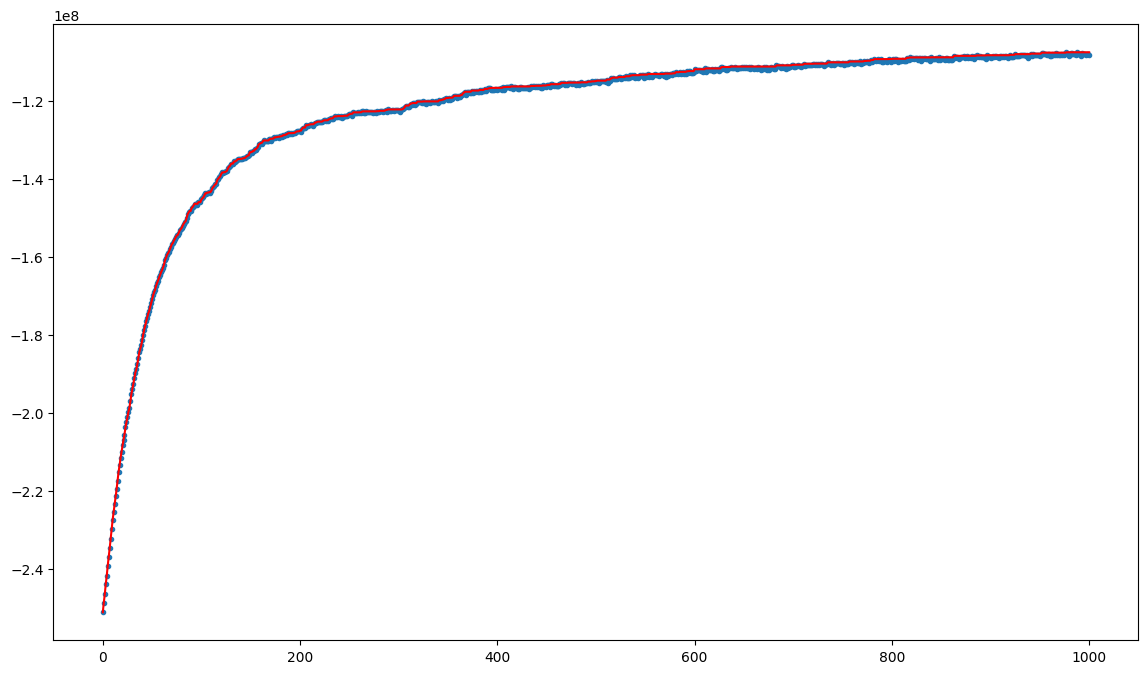

In [62]:
""" Instance: 4"""
UNIVERSE_SIZE = USIZES_LIST[3]
NUM_SETS = NSETS_LIST[3]
DENSITY = DENSITIES_LIST[3] 

create_and_define_sets()

initial_solution = np.full(NUM_SETS, True)  # Starting from an always valid solution?

best_solution, best_cost, history = simulated_annealing(initial_solution)

print(f"Best solution cost: {best_cost}")
print(f"Is the solution valid? {'Yes' if valid(best_solution) else 'No'}")
print(f"Numbers of subsets: {np.count_nonzero(best_solution)}")

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),     #plot max cost at each step
    color="red"
)
_ = plt.scatter(range(len(history)), history, marker=".")

  0%|          | 0/1000 [00:00<?, ?it/s]

Best solution cost: 227458975.22152615
Is the solution valid? Yes
Numbers of subsets: 4225


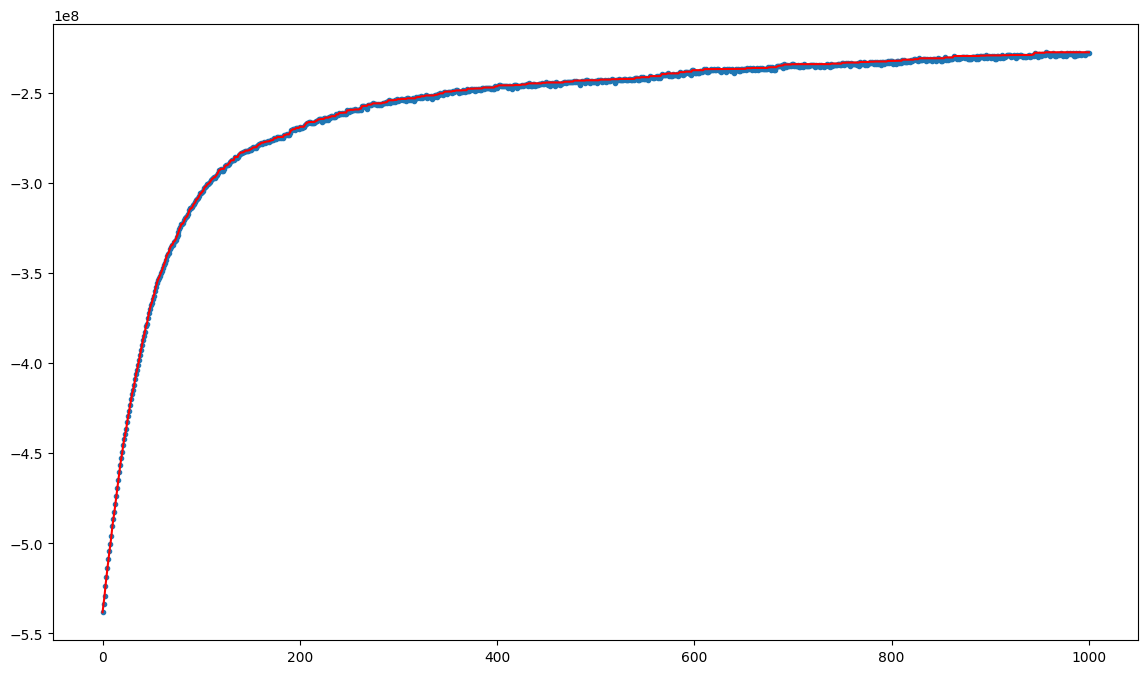

In [63]:
""" Instance: 5"""
UNIVERSE_SIZE = USIZES_LIST[4]
NUM_SETS = NSETS_LIST[4]
DENSITY = DENSITIES_LIST[4] 

create_and_define_sets()

initial_solution = np.full(NUM_SETS, True)  # Starting from an always valid solution?

best_solution, best_cost, history = simulated_annealing(initial_solution)

print(f"Best solution cost: {best_cost}")
print(f"Is the solution valid? {'Yes' if valid(best_solution) else 'No'}")
print(f"Numbers of subsets: {np.count_nonzero(best_solution)}")

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),     #plot max cost at each step
    color="red"
)
_ = plt.scatter(range(len(history)), history, marker=".")

  0%|          | 0/1000 [00:00<?, ?it/s]

Best solution cost: 359460786.89962685
Is the solution valid? Yes
Numbers of subsets: 4274


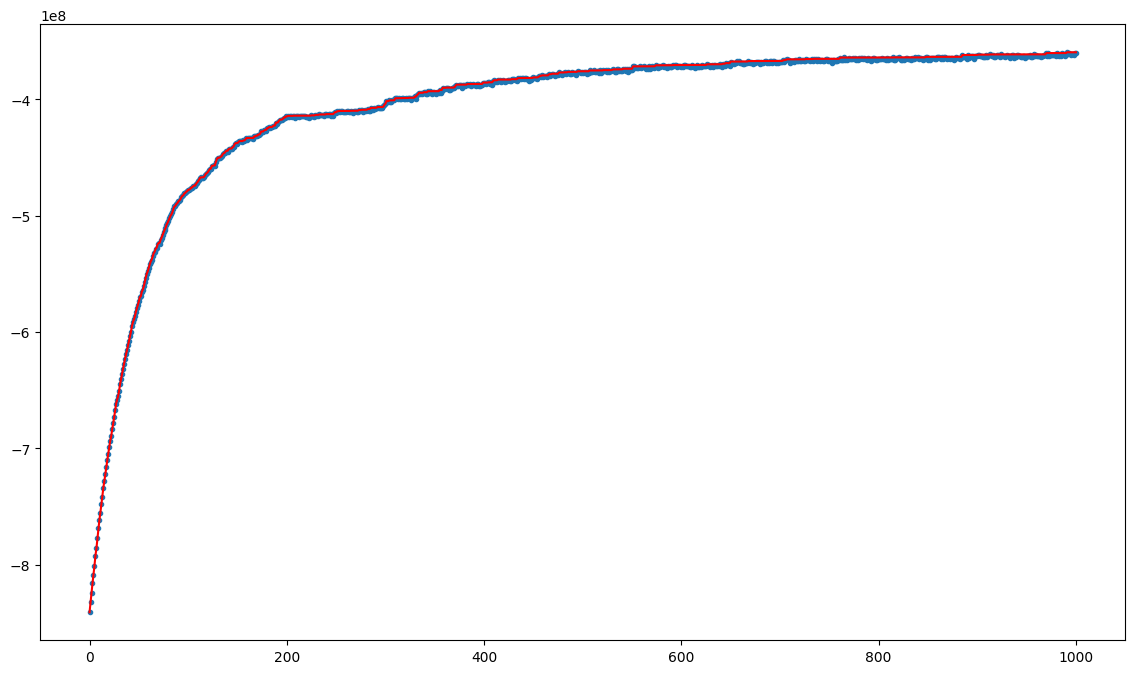

In [64]:
""" Instance: 6"""
UNIVERSE_SIZE = USIZES_LIST[5]
NUM_SETS = NSETS_LIST[5]
DENSITY = DENSITIES_LIST[5] 

create_and_define_sets()

initial_solution = np.full(NUM_SETS, True)  # Starting from an always valid solution?

best_solution, best_cost, history = simulated_annealing(initial_solution)

print(f"Best solution cost: {best_cost}")
print(f"Is the solution valid? {'Yes' if valid(best_solution) else 'No'}")
print(f"Numbers of subsets: {np.count_nonzero(best_solution)}")

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),     #plot max cost at each step
    color="red"
)
_ = plt.scatter(range(len(history)), history, marker=".")